In [24]:
from layowt.grids import Grid
from layowt.layouts import Layout, geoms_from_shapefile, geoms_from_postgis
import fiona
from shapely.geometry import shape
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gp

In [18]:
areas = geoms_from_shapefile('prototype_inputs/lease_area_hole.shp')
exclusions = geoms_from_shapefile('prototype_inputs/exclusions.shp')

In [11]:
areas = geoms_from_postgis(username="guillermo.tornero@ow-postgre", 
                           password="hg3ufz==CcP2",
                           schema="IE",
                           db_name="corp_ta_ea",
                           table="RNM_OW_Poject_Boundary_20210910")

(<Figure size 576x432 with 1 Axes>, <AxesSubplot:>)

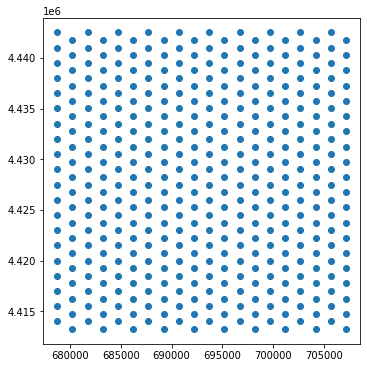

In [17]:
grid = Grid(n_rows=20, n_cols=20, x_shear=0, origin=(areas[0].centroid.x, areas[0].centroid.y), scale=250)
grid.plot()

(<Figure size 576x432 with 1 Axes>, <AxesSubplot:>)

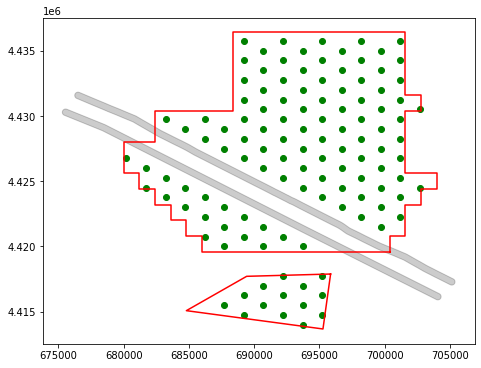

In [25]:
layout = Layout(grid=grid)
layout.clip_to_area(areas)
layout.avoid_exclusions(exclusions)
layout.plot()

In [3]:
layout = Layout.from_shapefile("prototype_inputs/USA-NYB-CBI-NGT260-20-86-001.shp")
#layout = Layout.from_shapefile('prototype_inputs/lease_area.shp')

layout.clip_to_area(areas[0], mode='a')
layout.avoid_exclusions(exclusions)
print(layout.n_wtg)
#layout.clip_to_area(areas[1], mode='a')
#layout.avoid_exclusions(exclusions)
#layout.clip_to_area(areas[0], mode='w')
#layout.avoid_exclusions(exclusions[1], mode='a')

layout.plot()
print(len(areas))

NameError: name 'areas' is not defined

In [ ]:
layout.reset_area()
layout.plot()

(<Figure size 576x432 with 1 Axes>, <AxesSubplot:>)

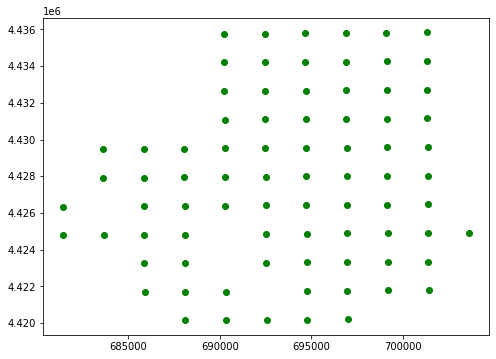

In [31]:
layout = Layout.from_text("prototype_inputs/USA-NYB-CBI-NGT260-21-80-002 (DTF V5).csv", x_header="X UTM 18N [m]", y_header="Y UTM 18N [m]")
layout.plot()

AttributeError: 'Point' object has no attribute 'geoms'

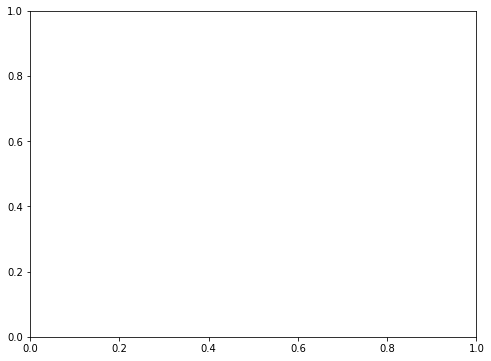

In [30]:
layout = Layout.from_postgis(username="guillermo.tornero@ow-postgre", password="hg3ufz==CcP2", schema="GB_CAL", table="OW_LAYOUT_NGT250_18_112_001")
layout.plot()
#layout.geom.geoms[0].get_x()

In [ ]:
layout = Layout(grid=grid)
layout.plot()

In [ ]:
layout.clip_to_area(areas)
layout.plot()
print(layout.n_wtg)

In [ ]:
layout.avoid_exclusions(areas[1])
layout.plot()
print(layout.n_wtg)

In [ ]:
layout.plot(ax=ax)
fig

In [ ]:
layout.reset_geom()
layout.plot()
print(layout.n_wtg)

In [2]:
with fiona.open('prototype_inputs/exclusions - Copy.shp') as src:
    exclusion_crs = src.crs
    exclusions = [shape(rec['geometry']) for rec in src]

In [13]:
fiona.crs.to_string(fiona.crs.from_epsg(25831))

'+init=epsg:25831 +no_defs'

In [ ]:
layout.clip_to_area(areas)
layout.avoid_exclusions(exclusions)
layout.plot()

In [ ]:
layout.reset_area()
layout.plot()

In [ ]:
layout.clip_to_area(areas)
layout.reset_exclusion()
layout.plot()

In [32]:
layout.to_shapefile('output.shp', epsg=32618)

c:\Users\GuillermoTornero\OneDrive - Oceanwinds\X - PERSONAL\Python\layOWt\venv\lib\site-packages\pyproj\crs\crs.py:1282: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [40]:
grids = []
layouts = []

for row_step in np.arange(5, 10, 0.5):
    for col_step in np.arange(5, 10, 0.5):
        for angle in np.arange(0, 90, 5):
            grid = Grid(n_rows=20, n_cols=20, row_step=row_step, col_step=col_step, angle=angle, origin=(areas[0].centroid.x, areas[0].centroid.y), scale=250)
            layout = Layout(grid)
            layout.clip_to_area(areas)
            #layout.avoid_exclusions(exclusions)
            layouts.append(layout)

In [ ]:
good_layouts = [layout for layout in layouts if layout.n_wtg == 100]

<AxesSubplot:>

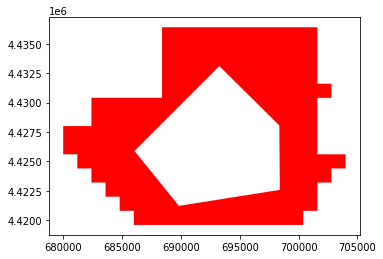

In [23]:
gdf = gp.GeoDataFrame({'geometry':areas})
gdf.plot(color='r')